In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from noise_correlations.data import datasets

In [2]:
d = loadmat('kohn_pvc-11/stimuli_gratings/M_grating060.mat')

In [3]:
# data paths
fname = 'nc_datasets/R32_B7_MUAR_ext_rsp.h5'
with h5py.File(fname, 'r') as f:
    resp = f['final_rsp'].value
n_el, n_samples, n_freq, n_attn = resp.shape
Yp = np.transpose(resp[..., 5], axes=(0, 2, 1))
trial_medians = np.median(Yp, axis=-1)
keep = (trial_medians.max(axis=1) / trial_medians.min(axis=1)) >= 5.
Yp = Yp[keep]
bfs = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bfs)
bfs = bfs[idxs]
Yp_fs = Yp[idxs]

/Users/jesse/anaconda3/envs/noise_correlations/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
# data paths
folder = 'kohn_pvc-11/'
ds = datasets.KohnCRCNSpvc11_monkey(folder)
Yp = ds.data_tensor()
trial_median = np.median(Yp, axis=-1)
keep = np.logical_and(trial_median.max(axis=-1) >= 15,
                      trial_median.max(axis=-1) >= 2.0 * trial_median.min(axis=-1))
Yp = Yp[keep]
bas = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bas)
Yp_as = Yp[idxs]
bas = bas[idxs]

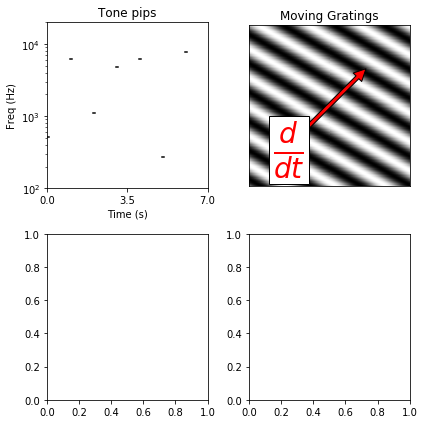

In [13]:
f, axes = plt.subplots(2, 2, figsize=(6, 6))

ax = axes[0, 0]
T = 7
ax.set_title('Tone pips')
ax.set_xlim(0, T)
ax.set_xticks([0, T/2., T])
ax.set_xlabel('Time (s)')

ax.set_yscale('log')
ax.set_ylim(1e2, 2e4)
ax.set_xticks([0, T/2., T])
ax.set_ylabel('Freq (Hz)')
for ii in range(T):
    f = np.power(10., np.random.uniform(low=np.log10(2e2), high=np.log10(1e4)))
    ax.plot([ii, ii+.1], [f, f], c='k')

ax = axes[0, 1]
ax.set_title('Moving Gratings')
ax.imshow(d['M'][:, :, 0], cmap='gray', extent=[0, 1, 0, 1], aspect='equal')
ax.set_xticks([])
ax.set_yticks([])
ax.annotate('', xy=(.75, .75), xytext=(.3, .3),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='center',
            )
ax.text(.15, .15, r'$\frac{d}{dt}$', color='red', size=40,
        bbox=dict(facecolor='white', edgecolor='black'))
plt.tight_layout()
plt.savefig('stimuli.pdf', dpi=300)

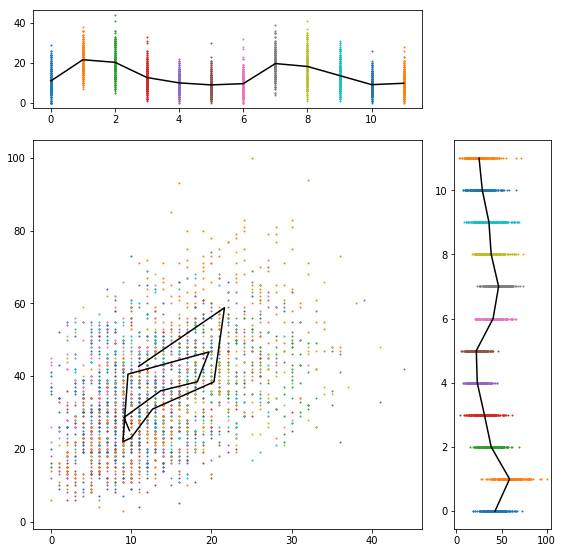

In [55]:
Y = Yp_fs[[1, 2]]

Y = Yp_as[[0, 3]]

f = plt.figure(figsize=(9, 9))

le = .1
re = .1
be = .1
te = .1
gap = .05
square_frac = .6
rect_height = min(1. - le - square_frac - gap - re, 1. - te - square_frac - gap - be)

ax0 = f.add_axes([le, be, square_frac, square_frac])
axt = f.add_axes([le, be + square_frac + gap, square_frac, rect_height])
axr = f.add_axes([le + square_frac + gap, be, rect_height, square_frac])

for ii in range(Y.shape[1]):
    ax0.scatter(*Y[:, ii], s=1.)
    axt.scatter(np.tile(ii, Y.shape[-1]), Y[0, ii], s=1.)
    axr.scatter(Y[1, ii], np.tile(ii, Y.shape[-1]), s=1.)
ax0.plot(*Y.mean(axis=-1), c='k')

axt.plot(np.arange(Y.shape[1]), Y[0].mean(axis=-1), c='k')
axr.plot(Y[1].mean(axis=-1), np.arange(Y.shape[1]), c='k')